<a href="https://colab.research.google.com/github/RajeshMTRA/ml-projects/blob/main/housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
import numpy as np
import os

In [ ]:
# only for jupyter notebook
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

## Download data

In [ ]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, 'housing.csv')
  return pd.read_csv(csv_path)

## Data Structure

In [ ]:
housing = load_housing_data()

In [ ]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


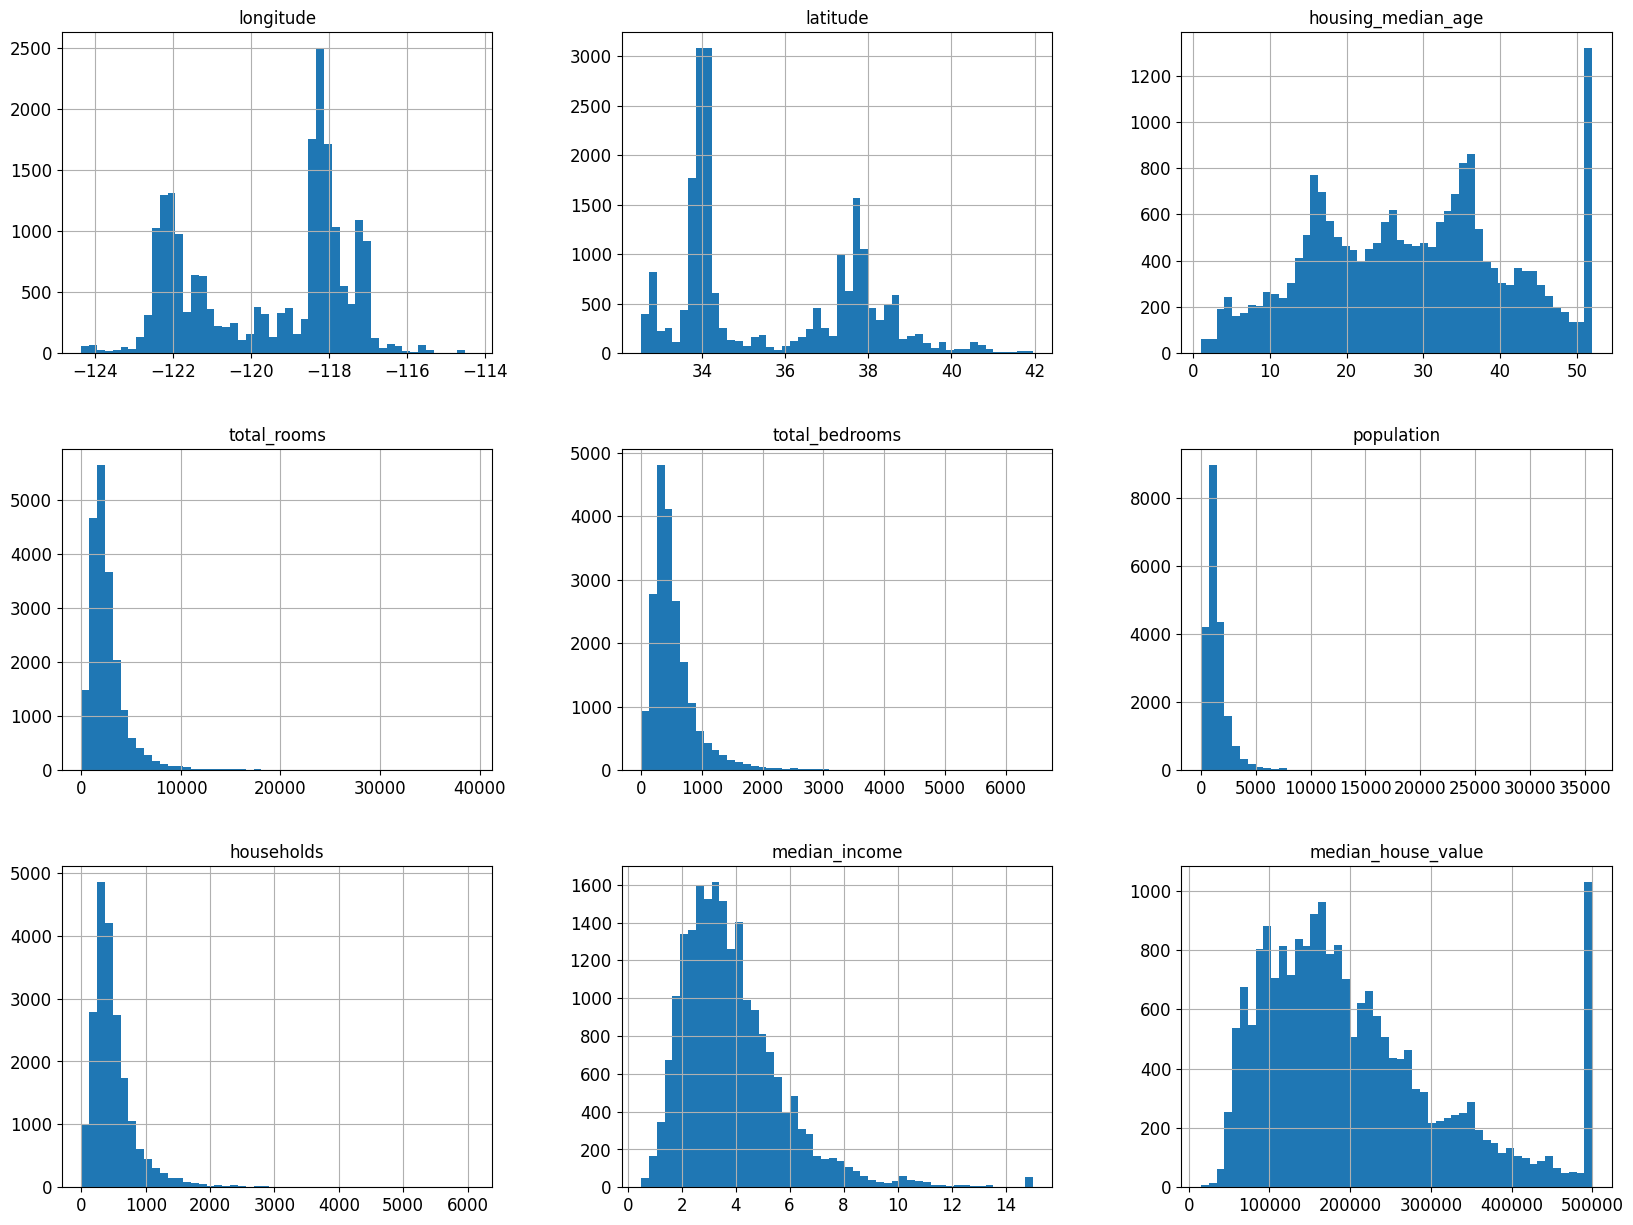

In [ ]:
housing.hist(bins= 50, figsize=(20,15))
plt.show()

## Train-Test Set

In [ ]:
np.random.seed(41)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=41)

In [ ]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2297,-119.76,36.81,19.0,4643.0,1429.0,4638.0,1335.0,1.2716,69400.0,INLAND
2039,-119.69,36.75,13.0,2343.0,409.0,1347.0,405.0,4.0027,93100.0,INLAND
604,-122.08,37.69,36.0,2350.0,499.0,1105.0,467.0,3.3021,195700.0,NEAR BAY
8291,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,3.5985,500001.0,NEAR OCEAN
9618,-120.46,37.29,30.0,2972.0,635.0,1940.0,590.0,2.3594,72300.0,INLAND


In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12054,-117.57,33.88,35.0,1755.0,446.0,1453.0,428.0,2.3160,119400.0,INLAND
14079,-117.11,32.77,50.0,1729.0,355.0,617.0,337.0,3.6705,167000.0,NEAR OCEAN
7423,-118.21,33.96,43.0,1686.0,446.0,1590.0,474.0,2.3241,159300.0,<1H OCEAN
7100,-117.99,33.90,33.0,2161.0,383.0,1235.0,383.0,5.6454,202800.0,<1H OCEAN
12628,-121.48,38.50,23.0,2679.0,792.0,1740.0,659.0,1.3679,70300.0,INLAND


## Stratified Shuffling

In [ ]:
housing["income_cat"] = pd.cut(housing.median_income, bins = [0., 1.5, 3, 4.5, 6., np.inf], labels = [1,2,3,4,5])

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

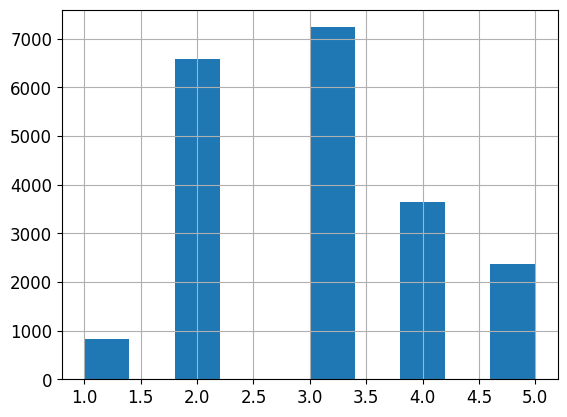

In [ ]:
housing.income_cat.hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = .2, random_state = 41)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set.income_cat.value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis = 1, inplace = True)

## Visualization

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10352,-117.68,33.63,13.0,5830.0,921.0,2897.0,891.0,6.2403,257400.0,<1H OCEAN
17338,-120.45,34.87,4.0,1533.0,221.0,545.0,191.0,7.5696,328700.0,<1H OCEAN
2084,-119.81,36.76,52.0,1792.0,352.0,1049.0,357.0,2.4375,57100.0,INLAND
2600,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,59200.0,<1H OCEAN
9710,-121.66,36.67,40.0,2878.0,592.0,1444.0,564.0,3.1439,192300.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

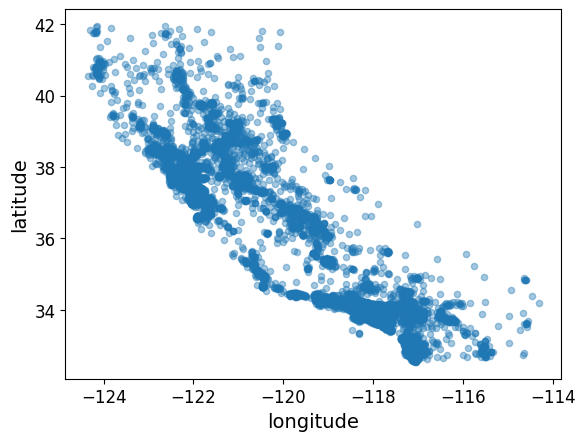

In [ ]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4)

<Axes: xlabel='longitude', ylabel='latitude'>

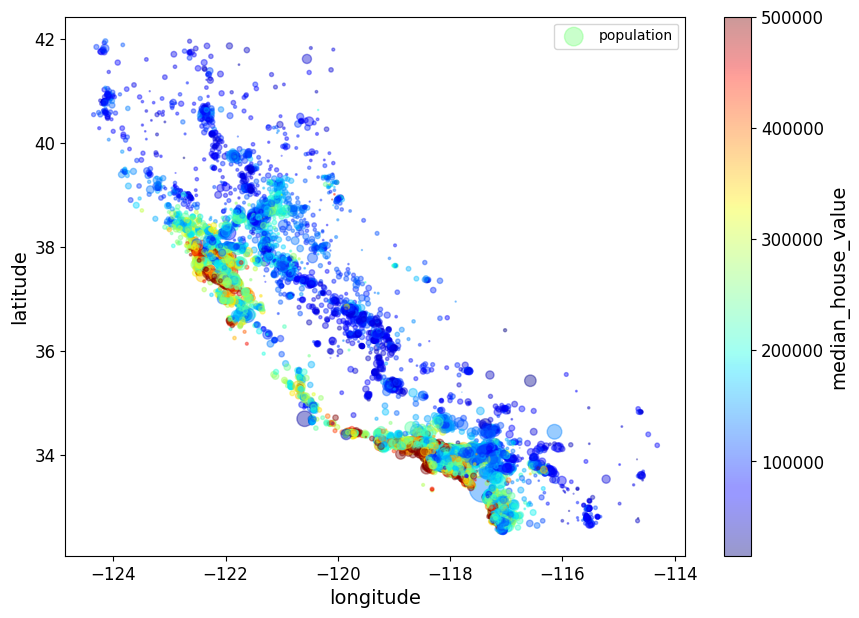

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, legend = True)

## Correlation

In [ ]:
# Pearson's Correlation Test
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-29-47d608524e30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687618
total_rooms           0.131906
housing_median_age    0.111626
households            0.063177
total_bedrooms        0.046562
population           -0.024792
longitude            -0.050021
latitude             -0.141423
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

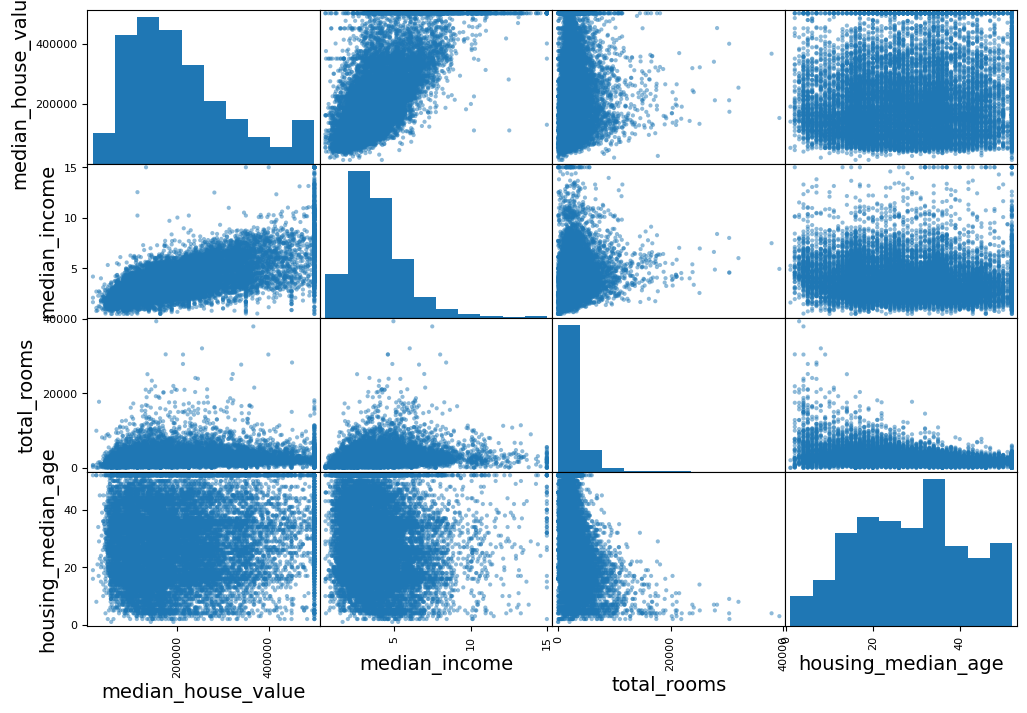

In [ ]:
# Pandas scatter_matrix
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

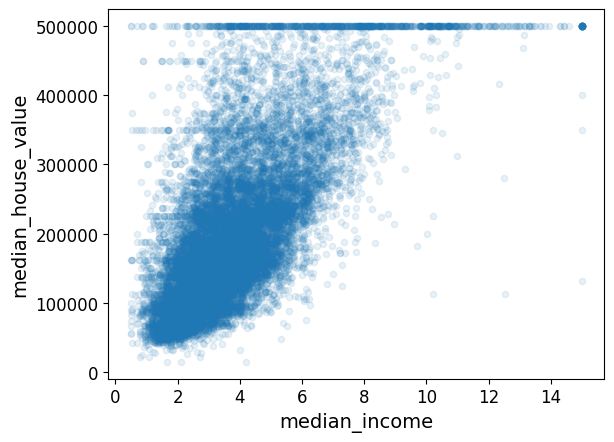

In [ ]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

In [ ]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
10352,-117.68,33.63,13.0,5830.0,921.0,2897.0,891.0,6.2403,257400.0,<1H OCEAN,6.543210,0.157976,3.251403
17338,-120.45,34.87,4.0,1533.0,221.0,545.0,191.0,7.5696,328700.0,<1H OCEAN,8.026178,0.144162,2.853403
2084,-119.81,36.76,52.0,1792.0,352.0,1049.0,357.0,2.4375,57100.0,INLAND,5.019608,0.196429,2.938375
2600,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,59200.0,<1H OCEAN,5.495413,0.213689,3.159021
9710,-121.66,36.67,40.0,2878.0,592.0,1444.0,564.0,3.1439,192300.0,<1H OCEAN,5.102837,0.205698,2.560284


In [ ]:
corr_matrix = housing.corr()

<ipython-input-35-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [ ]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687618
rooms_per_household         0.155927
total_rooms                 0.131906
housing_median_age          0.111626
households                  0.063177
total_bedrooms              0.046562
population                 -0.024792
population_per_household   -0.032126
longitude                  -0.050021
latitude                   -0.141423
bedrooms_per_room          -0.256603
Name: median_house_value, dtype: float64

## Data Cleaning

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 10352 to 17907
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16348 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16348 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [ ]:
#housing.dropna(subset = ['total_bedrooms'])

#housing.drop("total_bedrooms", axis = 1)

#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median", missing_values = np.nan)

housing_num = housing.drop('ocean_proximity', axis = 1)

imputer.fit(housing_num)

x = imputer.transform(housing_num)


In [ ]:
housing_trans = pd.DataFrame(x, columns = housing_num.columns)

In [ ]:
housing_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


## Handling Text & Categorical Data

Ordinal -> Data has an order

Label -> No order

In [ ]:
housing_oc = housing[['ocean_proximity']]
housing_oc.value_counts()

ocean_proximity
<1H OCEAN          7265
INLAND             5252
NEAR OCEAN         2148
NEAR BAY           1843
ISLAND                4
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

housing_oc_tr = onehotencoder.fit_transform(housing_oc)

In [ ]:
housing_oc_tr.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

## Feature Scaling

1. Min Max Scaling (Normalization)
2. Standardization

In [ ]:
housing_trans.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-117.68,33.63,13.0,5830.0,921.0,2897.0,891.0,6.2403,257400.0,6.543210,0.157976,3.251403
1,-120.45,34.87,4.0,1533.0,221.0,545.0,191.0,7.5696,328700.0,8.026178,0.144162,2.853403
2,-119.81,36.76,52.0,1792.0,352.0,1049.0,357.0,2.4375,57100.0,5.019608,0.196429,2.938375
3,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,59200.0,5.495413,0.213689,3.159021
4,-121.66,36.67,40.0,2878.0,592.0,1444.0,564.0,3.1439,192300.0,5.102837,0.205698,2.560284


In [ ]:
housing_median_house_value = housing_trans['median_house_value']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
housing_scaled = scaler.fit_transform(housing_trans.drop(['median_house_value'], axis = 1))

In [ ]:
housing_scaled

array([[ 0.94352925, -0.93818058, -1.24485972, ...,  0.45207418,
        -0.95032045,  0.03461683],
       [-0.44054505, -0.35628414, -1.95910285, ...,  1.05168129,
        -1.18961955, -0.02718515],
       [-0.12075893,  0.53063867,  1.85019384, ..., -0.16396238,
        -0.28421883, -0.01399054],
       ...,
       [ 1.52314159, -0.77862833, -1.24485972, ...,  0.19048571,
        -0.3557734 , -0.02613743],
       [ 0.63373645, -0.85371174, -0.92741833, ..., -0.03399784,
        -0.34983503, -0.02027863],
       [-1.19504042,  0.81220146,  0.34234724, ..., -0.53179477,
         0.49444818, -0.07513872]])

In [ ]:
housing_scaled = pd.DataFrame(housing_scaled)

In [ ]:
housing_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.943529,-0.938181,-1.244860,1.456993,0.911978,1.304563,1.022654,1.246215,0.452074,-0.950320,0.034617
1,-0.440545,-0.356284,-1.959103,-0.504450,-0.750866,-0.779387,-0.806187,1.945424,1.051681,-1.189620,-0.027185
2,-0.120759,0.530639,1.850194,-0.386224,-0.439676,-0.332827,-0.372490,-0.754048,-0.163962,-0.284219,-0.013991
3,-2.029482,2.571969,-0.768698,-0.383942,-0.363660,-0.347003,-0.450869,-1.251852,0.028419,0.014786,0.020272
4,-1.045141,0.488404,0.897870,0.109500,0.130442,0.017157,0.168324,-0.382483,-0.130310,-0.123641,-0.072701


## Train a model

### Linear Regression

In [ ]:
X = housing_scaled
y = housing_median_house_value

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
y_pred

array([397707.16569211, 150917.14880547, 154604.9801108 , ...,
        84478.18011539,  66276.31878036, 121545.30464447])

In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test,y_pred)

In [ ]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68470.98258395916

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(pred, y_train)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train, scoring= "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
print("Scores:", tree_rmse_scores)

Scores: [70129.04703071 72944.77332356 74260.35599234 75234.2922754
 73582.71049894 73977.59489393 72161.29007653 68706.63681997
 73936.37073752 73592.89504601]
